In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../datos/bank-full.csv')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45131,47,management,married,tertiary,no,0,no,no,cellular,27,oct,508,1,-1,0,unknown,yes
30931,48,technician,married,tertiary,no,150,yes,no,cellular,9,feb,168,2,203,7,failure,no
9517,35,management,married,tertiary,no,482,no,no,unknown,6,jun,129,2,-1,0,unknown,no


In [30]:
df['duracion_llamada'] = pd.cut(df['duration'], bins = (0,103,319,515,4918), labels = ('corta', 'media', 'larga', 'excesiva'))

In [35]:
df['age'].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [38]:
df['edades'] = pd.cut(df['age'], bins = (18, 30, 50, 75, 96), labels = ('18-30', '30-50', '51-75', '75+'))

In [39]:
df.sample(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,duracion_llamada,edades
16490,25,services,married,secondary,no,72,yes,no,cellular,23,jul,305,2,-1,0,unknown,no,media,18-30
13509,60,housemaid,married,secondary,no,681,no,yes,cellular,9,jul,337,1,-1,0,unknown,no,larga,51-75
14999,43,management,married,primary,no,1880,yes,no,cellular,17,jul,63,6,-1,0,unknown,no,corta,30-50


1 - age (numeric)

2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
"blue-collar","self-employed","retired","technician","services")

3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4 - education (categorical: "unknown","secondary","primary","tertiary")

5 - default: has credit in default? (binary: "yes","no")

6 - balance: average yearly balance, in euros (numeric)

7 - housing: has housing loan? (binary: "yes","no")

8 - loan: has personal loan? (binary: "yes","no")

9 - contact: contact communication type (categorical: "unknown","telephone","cellular")

10 - day: last contact day of the month (numeric)

11 - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")

12 - duration: last contact duration, in seconds (numeric)

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

17 - y - has the client subscribed a term deposit? (binary: "yes","no")

1- Extraer los siguentes estadísiticos del conjunto de datos para varias de las varibles disponibles:
- Tabla de contingencia
- Coeficiente de correlación de las variables numéricas del dataset.
- Sesgos de alguna de las variables numéricas del dataset.
- Intervalo de confianza de algunas de las variables numéricas del dataset

In [11]:
df_job_ed = pd.crosstab(df['job'], df['education'], margins=True)
df_job_ed

education,primary,secondary,tertiary,unknown,All
job,,,,,
admin.,209,4219,572,171,5171
blue-collar,3758,5371,149,454,9732
entrepreneur,183,542,686,76,1487
housemaid,627,395,173,45,1240
management,294,1121,7801,242,9458
retired,795,984,366,119,2264
self-employed,130,577,833,39,1579
services,345,3457,202,150,4154
student,44,508,223,163,938


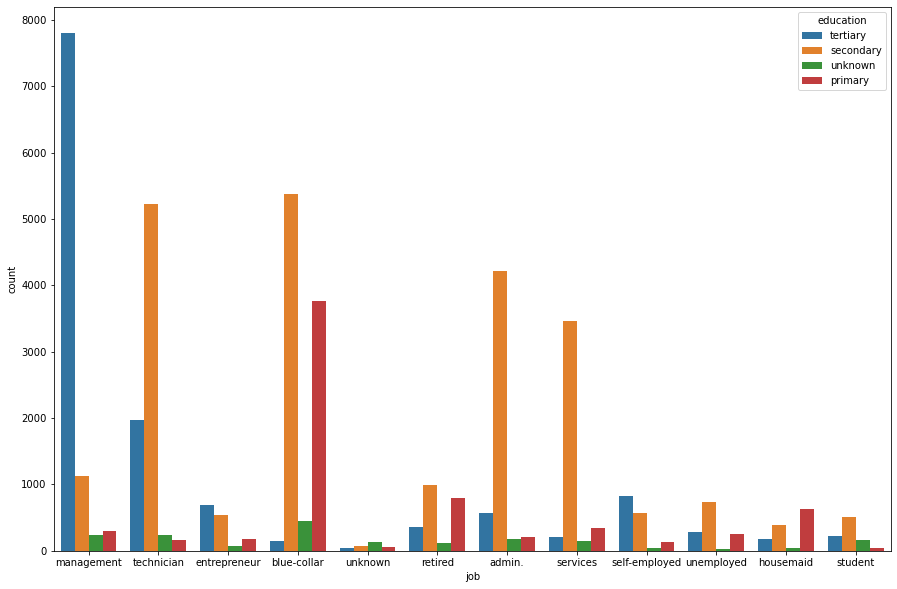

In [26]:
plt.figure(figsize=(15,10))

fig = sns.countplot(x = df['job'], hue = df['education'])

plt.show()

In [27]:
df_job_loan = pd.crosstab(df['job'], df['loan'], margins=True)
df_job_loan

loan,no,yes,All
job,,,
admin.,4180,991,5171
blue-collar,8048,1684,9732
entrepreneur,1131,356,1487
housemaid,1088,152,1240
management,8205,1253,9458
retired,1955,309,2264
self-employed,1350,229,1579
services,3318,836,4154
student,926,12,938


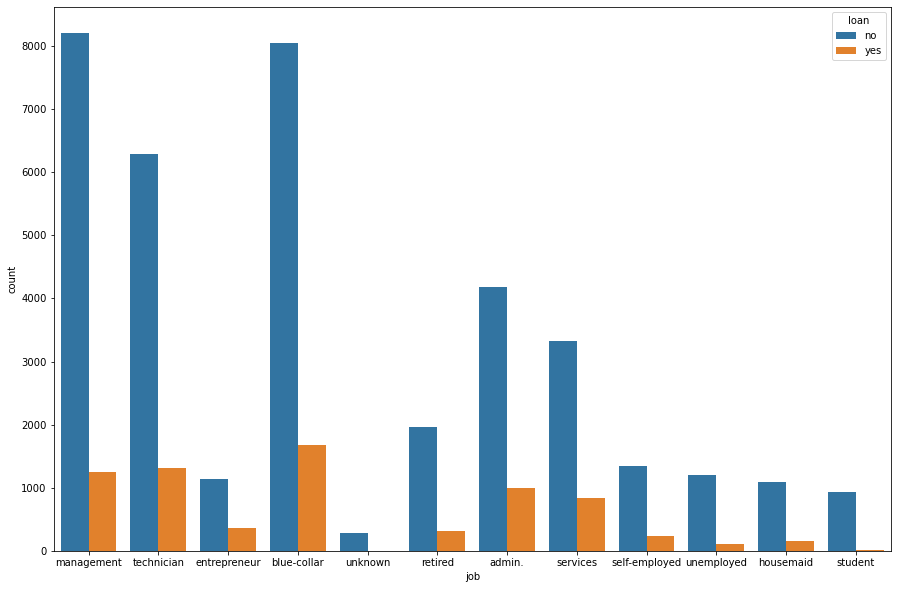

In [28]:
plt.figure(figsize=(15,10))

fig = sns.countplot(x = df['job'], hue = df['loan'])

plt.show()

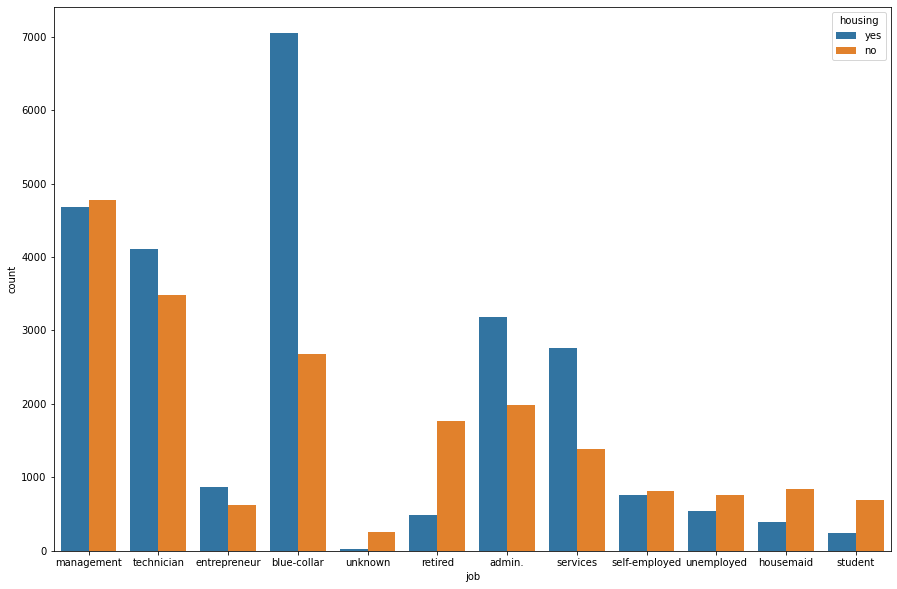

In [29]:
plt.figure(figsize=(15,10))

fig = sns.countplot(x = df['job'], hue = df['housing'])

plt.show()

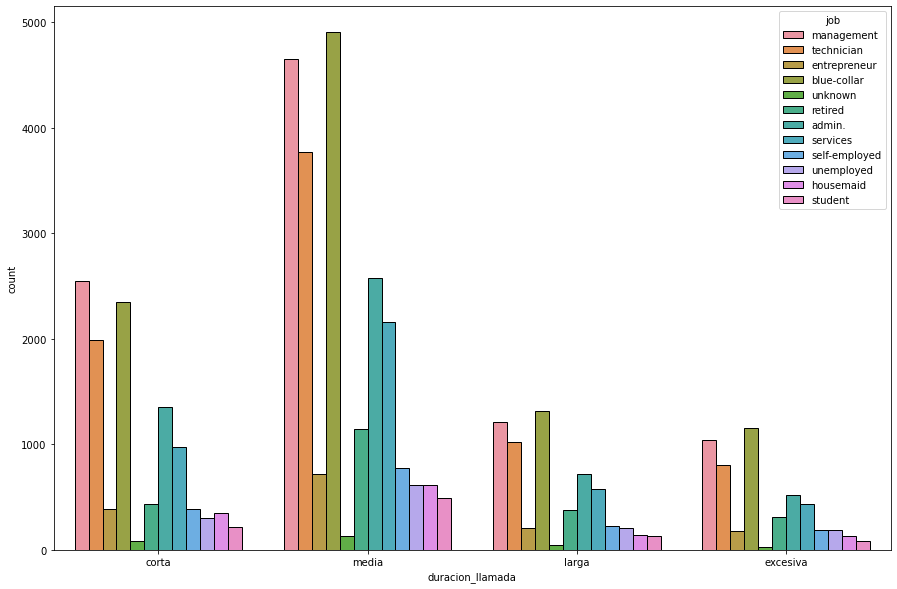

In [44]:
plt.figure(figsize=(15,10))

fig = sns.countplot(x = df['duracion_llamada'], hue = df['job'], edgecolor = 'black')

plt.show()

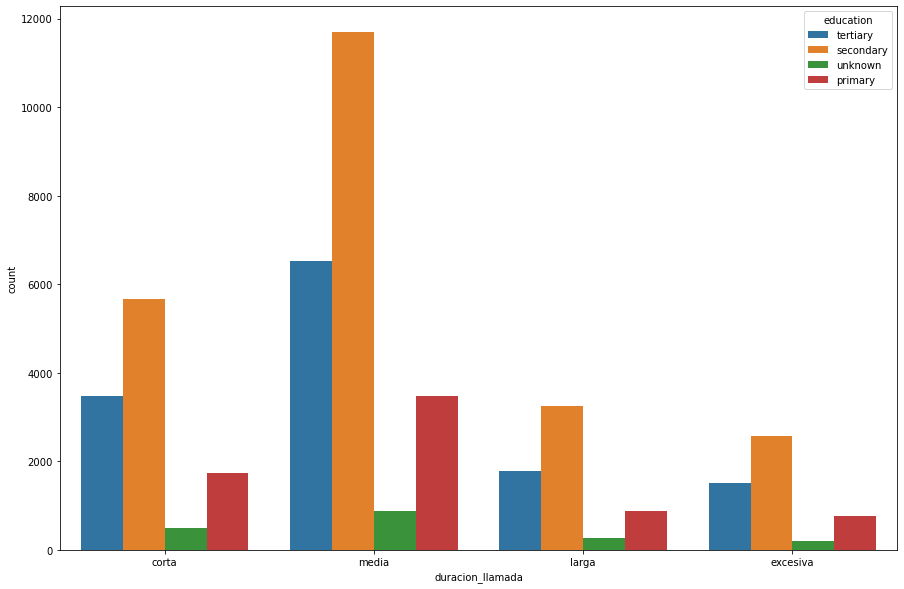

In [42]:
plt.figure(figsize=(15,10))

fig = sns.countplot(x = df['duracion_llamada'], hue = df['education'])

plt.show()

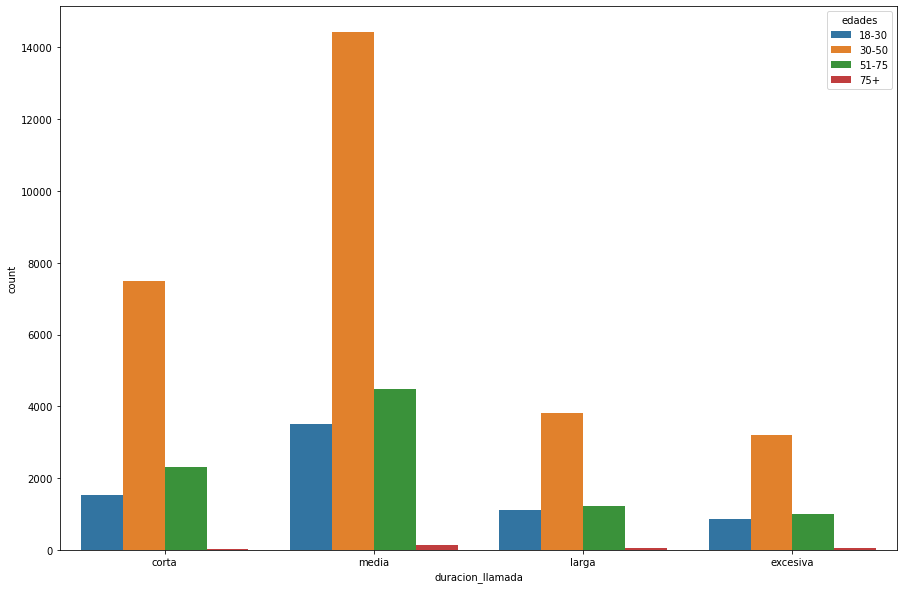

In [41]:
plt.figure(figsize=(15,10))

fig = sns.countplot(x = df['duracion_llamada'], hue = df['edades'])

plt.show()

Queríamos averiguar si existía una relación entre duración de la llamada y edad, sospechando un posible aumento de la duración a edades mayores, pero nuestros datos no apoyan dicha hipótesis.

La duracion de las llamadas se distribuyen de uyna manera similar para todos los rangos de edad.

<AxesSubplot:>

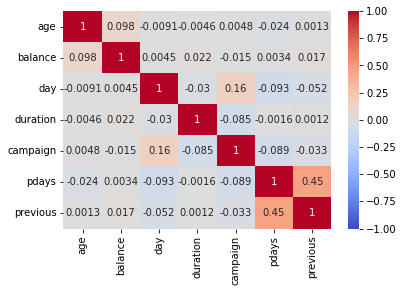

In [9]:
sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1, cmap = 'coolwarm')

Observamos que no existe ninguna correlacion significativa destacable entre nuestros datos numéricos. Únicamente encontramos una correlación media (0.45) entre la existencia de contactos previos con el cliente (previous) y la demora de contacto en días (pdays).

Esto se podría explicar debido a que en la campaña de márketing telefónico del banco se haya priorizado contactar primero con clientes menos afianzados (con menos contactos previos), que con aquellos con quienes el contacto es más habitual y que por este motivo, a mayor numero de contactos previos, más días de demora en la llamada de telemárketing.

2- Interpretación de los resultados.
- Ahora interpreta los resultados obtenidos de los diferentes estadísticos estudiados haciendo hincapié en aspectos interesantes de tus datos y explica lo mejor posible la naturaleza de los mismos.

    - Realizamos los análisis debajo de las gráficas y datos